In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df=pd.read_csv("Spam or Ham.csv")
df

,Message,Type
0,Congratulations! You've won a $1000 gift card....,spam
1,"Hey, are we still on for the meeting tomorrow ...",ham
2,Your loan application has been approved. Conta...,spam
3,Can you send me the report by EOD?,ham
4,Get your free subscription to premium services...,spam
5,Please let me know if you're free for a quick ...,ham
6,You've been selected for a chance to win an iP...,spam
7,Don't forget to submit the project by the dead...,ham
8,Win a free trip to Bali! Sign up now and enter...,spam
9,I'll call you back in a few minutes.,ham


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Message  31 non-null     object
 1   Type     31 non-null     object
dtypes: object(2)
memory usage: 628.0+ bytes


In [5]:
if df.isna().values.any():
    print("True")
else:
    print("False")
print('-'*50)
df.isna().sum()

False
--------------------------------------------------


Message    0
Type       0
dtype: int64

In [6]:
df["Type"].unique()

array(['spam', 'ham'], dtype=object)

In [7]:
label=LabelEncoder()

In [8]:
df["Type"]=label.fit_transform(df["Type"])

In [9]:
stop=set(stopwords.words('english'))
lem=WordNetLemmatizer()

In [10]:
def preprocess(text):
    text=text.lower()
    text=re.sub(r'\d+','',text)
    text=re.sub(r'\[^\s\w]','',text)
    tok=text.split()
    tok=[lem.lemmatize(word) for word in tok if word not in stop]
    
    return ' '.join(tok)
if 'Message' in df.columns:
    df["Message"]=df["Message"].apply(preprocess)

In [11]:
df

,Message,Type
0,congratulations! $ gift card. call claim prize.,1
1,"hey, still meeting tomorrow am?",0
2,loan application approved. contact u details.,1
3,send report eod?,0
4,get free subscription premium services. limite...,1
5,please let know free quick chat later.,0
6,selected chance win iphone. click link partici...,1
7,forget submit project deadline.,0
8,win free trip bali! sign enter contest.,1
9,i'll call back minutes.,0


In [12]:
x=df["Message"]
y=df["Type"].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1])

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train

4     get free subscription premium services. limite...
16    claim free bonus point expire. check account now.
5                please let know free quick chat later.
13     could review document provide feedback tomorrow?
11    let's catch coffee weekend. let know availabil...
22                     holiday package! redeem expires.
1                       hey, still meeting tomorrow am?
2         loan application approved. contact u details.
25                     schedule quick sync-up tomorrow?
3                                      send report eod?
21                     available team discussion later?
26            win brand-new car! enter sweepstakes now.
18    urgent: update payment information avoid servi...
30    congratulations! lucky number selected. claim ...
20            win brand-new car! enter sweepstakes now.
7                       forget submit project deadline.
10    hurry! sale end today. visit store amazing dis...
14    account flagged suspicious activity. verif

In [14]:
vec=TfidfVectorizer()
vec

TfidfVectorizer()

In [15]:
x_trv=vec.fit_transform(x_train) #vectorized x_train
x_tev=vec.transform(x_test) #vectorized x_test

In [16]:
#1. Logistic Regression
reg=LogisticRegression()

In [17]:
reg.fit(x_trv,y_train)

LogisticRegression()

In [18]:
log_pred=reg.predict(x_tev)
logx_pred=reg.predict(x_trv)
log_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1])

In [21]:
mapping = {0: "ham", 1: "spam"}
pred=[mapping[value] for value in log_pred]
pred


['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam']

In [19]:
acc=accuracy_score
cm=confusion_matrix(y_test,log_pred)
cr=classification_report

In [20]:
#Accuracy, Confusion Matrix, Classification Report for Logistic Regression
print("Accuracy Score of Logistic Regression:",acc(y_test,log_pred))
print('-'*50)
print("Confusion Matrix of Logistic Regression:","\n",cm)
print('-'*50)
print("Classification Report of Logistic Regression:","\n",cr(y_test,log_pred))

Accuracy Score of Logistic Regression: 1.0
--------------------------------------------------
Confusion Matrix of Logistic Regression: 
 [[5 0]
 [0 5]]
--------------------------------------------------
Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [22]:
dfp={'Numerical Prediction-LR':[0, 0, 1, 0, 1, 0, 0, 1, 1, 1],'Categorical Prediction-LR':['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam']}
dfp=pd.DataFrame(dfp)
dfp

,Numerical Prediction-LR,Categorical Prediction-LR
0,0,ham
1,0,ham
2,1,spam
3,0,ham
4,1,spam
5,0,ham
6,0,ham
7,1,spam
8,1,spam
9,1,spam


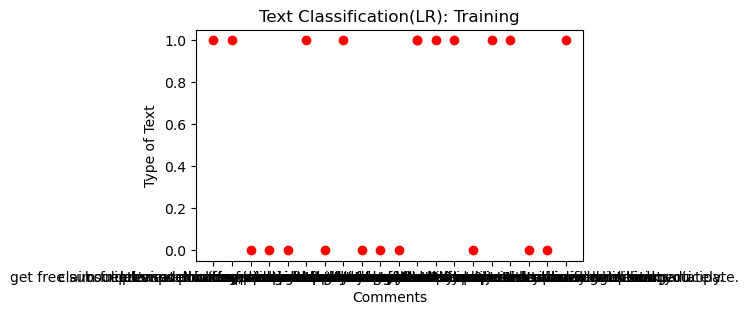

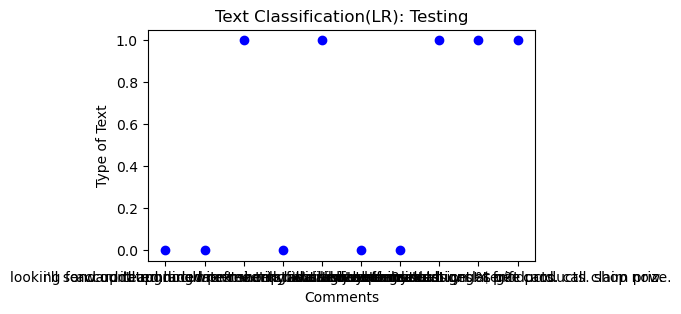

In [23]:
plt.figure(figsize=(5, 3))
plt.scatter(x_train,y_train,color='r')
plt.xlabel('Comments')
plt.ylabel('Type of Text')
plt.title("Text Classification(LR): Training")
plt.show()

plt.figure(figsize=(5, 3))
plt.scatter(x_test,y_test,color='b')

plt.xlabel('Comments')
plt.ylabel('Type of Text')
plt.title("Text Classification(LR): Testing")
plt.show()

In [24]:
#2. kNN
knn=KNeighborsClassifier(n_neighbors=3) #if n_neighbors=1, the prediction will be the same as Logistic Regression

In [25]:
knn.fit(x_trv,y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
knn_pred=knn.predict(x_tev)
knn_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1])

In [27]:
mapping = {0: "ham", 1: "spam"}
pred=[mapping[value] for value in knn_pred]
pred

['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam']

In [28]:
dfk={'Numerical Prediction-kNN':[0, 0, 1, 0, 1, 0, 0, 0, 1, 1],'Categorical Prediction-kNN':['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam']}
dfk=pd.DataFrame(dfk)
dfk

,Numerical Prediction-kNN,Categorical Prediction-kNN
0,0,ham
1,0,ham
2,1,spam
3,0,ham
4,1,spam
5,0,ham
6,0,ham
7,0,ham
8,1,spam
9,1,spam


In [29]:
#Accuracy, Confusion Matrix, Classification Report for kNN
cmr=confusion_matrix(y_test,knn_pred)
print("Accuracy Score for kNN:",acc(y_test,knn_pred))
print('-'*50)
print("Confusion Matrix for kNN:","\n",cmr)
print('-'*50)
print("Classification Report for kNN:","\n",cr(y_test,knn_pred))

Accuracy Score for kNN: 0.9
--------------------------------------------------
Confusion Matrix for kNN: 
 [[5 0]
 [1 4]]
--------------------------------------------------
Classification Report for kNN: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



In [30]:
#3. Multinomial Naive Bayes
mnb=MultinomialNB()
mnb

MultinomialNB()

In [31]:
mnb.fit(x_trv,y_train)

MultinomialNB()

In [32]:
mnb_pred=mnb.predict(x_tev)
mnb_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1])

In [33]:
mapping = {0: "ham", 1: "spam"}
pred=[mapping[value] for value in mnb_pred]
pred

['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam']

In [34]:
dfm={'Numerical Prediction-MNB':[0, 0, 1, 0, 1, 0, 0, 1, 1, 1],'Categorical Prediction-MNB':['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam']}
dfm=pd.DataFrame(dfm)
dfm

,Numerical Prediction-MNB,Categorical Prediction-MNB
0,0,ham
1,0,ham
2,1,spam
3,0,ham
4,1,spam
5,0,ham
6,0,ham
7,1,spam
8,1,spam
9,1,spam


In [35]:
#Accuracy, Confusion Matrix, Classification Report for Multinomial Naive Bayes
cmm=confusion_matrix(y_test,mnb_pred)
print("Accuracy Score for MNB:",acc(y_test,mnb_pred))
print('-'*50)
print("Confusion Matrix for MNB:","\n",cmm)
print('-'*50)
print("Classification Report for MNB:","\n",cr(y_test,mnb_pred))

Accuracy Score for MNB: 1.0
--------------------------------------------------
Confusion Matrix for MNB: 
 [[5 0]
 [0 5]]
--------------------------------------------------
Classification Report for MNB: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [36]:
#4. Random Forest
rf=RandomForestClassifier(n_estimators=150,random_state=42)
rf

RandomForestClassifier(n_estimators=150, random_state=42)

In [37]:
rf.fit(x_trv,y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [38]:
rf_pred=rf.predict(x_tev)
rf_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1])

In [39]:
mapping = {0: "ham", 1: "spam"}
pred=[mapping[value] for value in rf_pred]
pred

['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam']

In [40]:
dfr={'Numerical Prediction-MNB':[0, 0, 1, 0, 1, 0, 0, 1, 1, 1],'Categorical Prediction-MNB':['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam']}
dfr=pd.DataFrame(dfr)
dfr

,Numerical Prediction-MNB,Categorical Prediction-MNB
0,0,ham
1,0,ham
2,1,spam
3,0,ham
4,1,spam
5,0,ham
6,0,ham
7,1,spam
8,1,spam
9,1,spam


In [41]:
#Accuracy, Confusion Matrix, Classification Report for Random Forest
crf=confusion_matrix(y_test,rf_pred)
print("Accuracy Score for Random Forest:",acc(y_test,rf_pred))
print('-'*50)
print("Confusion Matrix for Random Forest:","\n",crf)
print('-'*50)
print("Classification Report for Random Forest:","\n",cr(y_test,rf_pred))

Accuracy Score for Random Forest: 1.0
--------------------------------------------------
Confusion Matrix for Random Forest: 
 [[5 0]
 [0 5]]
--------------------------------------------------
Classification Report for Random Forest: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



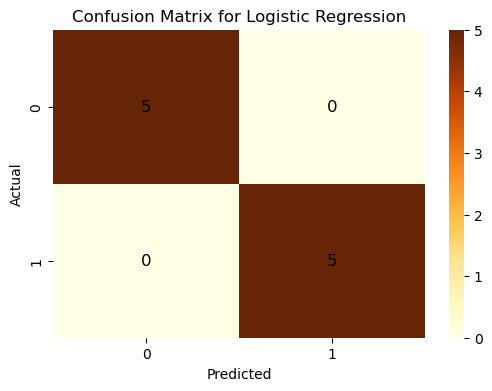

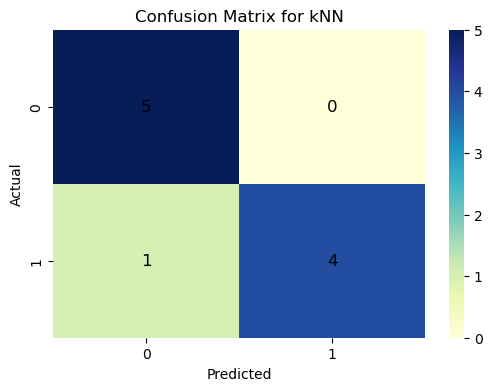

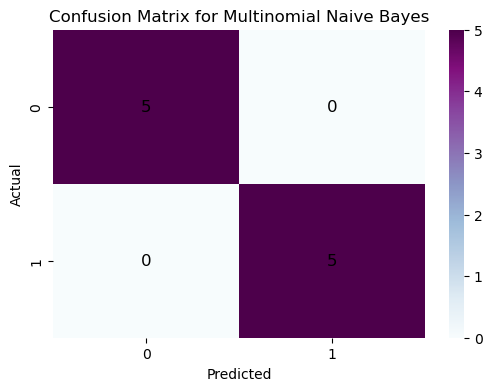

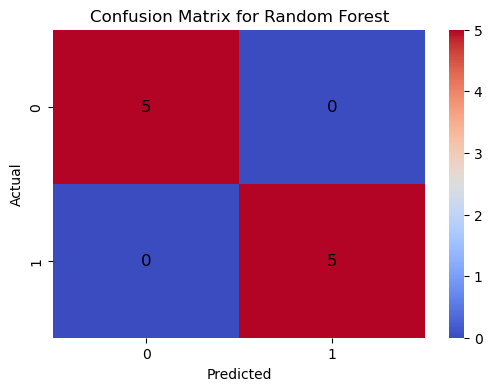

In [42]:
#Confusion Matrix Heatmap for Logistic Regression


plt.figure(figsize=(6, 4))
ax=sns.heatmap(cm, annot=False, cmap="YlOrBr", fmt="d")  

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j + 0.5, i + 0.5, str(cm[i, j]), ha='center', va='center', size=12, color='black')
        
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Confusion Matrix Heatmap for kNN
plt.figure(figsize=(6, 4))
ax=sns.heatmap(cmr, annot=False, cmap="YlGnBu", fmt="d")  

for i in range(cmr.shape[0]):
    for j in range(cmr.shape[1]):
        ax.text(j + 0.5, i + 0.5, str(cmr[i, j]), ha='center', va='center', size=12, color='black')
        
plt.title("Confusion Matrix for kNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Confusion Matrix Heatmap for Multinomial Naive Bayes
plt.figure(figsize=(6, 4))
ax=sns.heatmap(cmm, annot=False, cmap="BuPu", fmt="d")  

for i in range(cmm.shape[0]):
    for j in range(cmm.shape[1]):
        ax.text(j + 0.5, i + 0.5, str(cmm[i, j]), ha='center', va='center', size=12, color='Black')
        
plt.title("Confusion Matrix for Multinomial Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Confusion Matrix Heatmap for Random Forest
plt.figure(figsize=(6, 4))
ax=sns.heatmap(crf, annot=False, cmap="coolwarm", fmt="d")  

for i in range(crf.shape[0]):
    for j in range(crf.shape[1]):
        ax.text(j + 0.5, i + 0.5, str(crf[i, j]), ha='center', va='center', size=12, color='Black')

plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()